In [1]:
import numpy as np
import os
import sys
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import glob
from pathlib import Path

In [2]:
from pydicom import dcmread, read_file

# Leitura do arquivo DICOM

In [3]:
path = '../DICOM/PAT001/D0001.dcm'
ds = dcmread(path)
type(ds)

pydicom.dataset.FileDataset

# Manipulando metadados

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.5331506912231574009137053520150588438
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELICAL']
(0008, 0012) Instance Creation Date              DA: '0'
(0008, 0013) Instance Creation Time              TM: '174444.875'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(

In [8]:
ds.PatientAge

'032Y'

In [10]:
elem = ds['DistanceSourceToPatient']
print(f'{elem.VR}, {elem.value}')

DS, 570


In [11]:
ds[0x0018, 0x1111]

(0018, 1111) Distance Source to Patient          DS: '570.0'

In [12]:
ds_dict = ds.to_json_dict()

In [16]:
ds_dict.keys()

dict_keys(['00080005', '00080008', '00080012', '00080013', '00080016', '00080018', '00080020', '00080022', '00080023', '00080030', '00080032', '00080033', '00080050', '00080060', '00080070', '00080080', '00080090', '00081030', '0008103E', '00081070', '00081090', '00100010', '00100020', '00100030', '00100040', '00101010', '00101020', '00101030', '00104000', '00180010', '00180022', '00180050', '00180060', '00180090', '00181020', '00181030', '00181050', '00181100', '00181110', '00181111', '00181120', '00181130', '00181140', '00181150', '00181151', '00181152', '00181160', '00181210', '00185100', '0020000D', '0020000E', '00200010', '00200011', '00200012', '00200013', '00200032', '00200037', '00200052', '00201040', '00201041', '00280002', '00280004', '00280010', '00280011', '00280030', '00280100', '00280101', '00280102', '00280103', '00280106', '00280107', '00281050', '00281051', '00281052', '00281053', '7FE00010'])

In [23]:
ds_dict['00181151']

{'vr': 'IS', 'Value': [222]}

# Matriz da Imagem

In [5]:
arr = ds.pixel_array
arr.shape

(512, 512)

In [6]:
arr

array([[ 29,  25,  27, ...,  25,  25,  25],
       [ 28,  31,  23, ...,  15,  25,  25],
       [ 20,  30,  21, ...,  33,  33,  25],
       ...,
       [109, 118, 116, ..., 367, 436,  25],
       [130, 125, 117, ..., 393,  25,  25],
       [124, 116, 102, ...,  25,  25,  25]], dtype=uint16)

In [7]:
np.max(arr)

2244

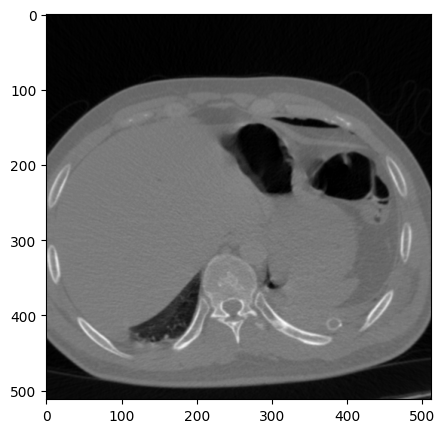

In [9]:
plt.figure(figsize=(10,5))
plt.imshow(arr, cmap='gray')

# Criando Volume

In [12]:
all_files_patitent = glob.glob('../DICOM/PAT001/*')

In [13]:
mri_data = []
for files in all_files_patitent:
    data = read_file(files)
    mri_data.append(data)

In [14]:
for slices in mri_data[0:5]:
    print(slices.SliceLocation)

797.5
887.5
845.5
928.5
779.5


In [15]:
mri_data_ordered = sorted(mri_data, key=lambda s: s.SliceLocation)
for slices in mri_data_ordered[:5]:
    print(slices.SliceLocation)

733.5
734.5
735.5
736.5
737.5


In [16]:
full_volume = []
for slices in mri_data_ordered:
    full_volume.append(slices.pixel_array)

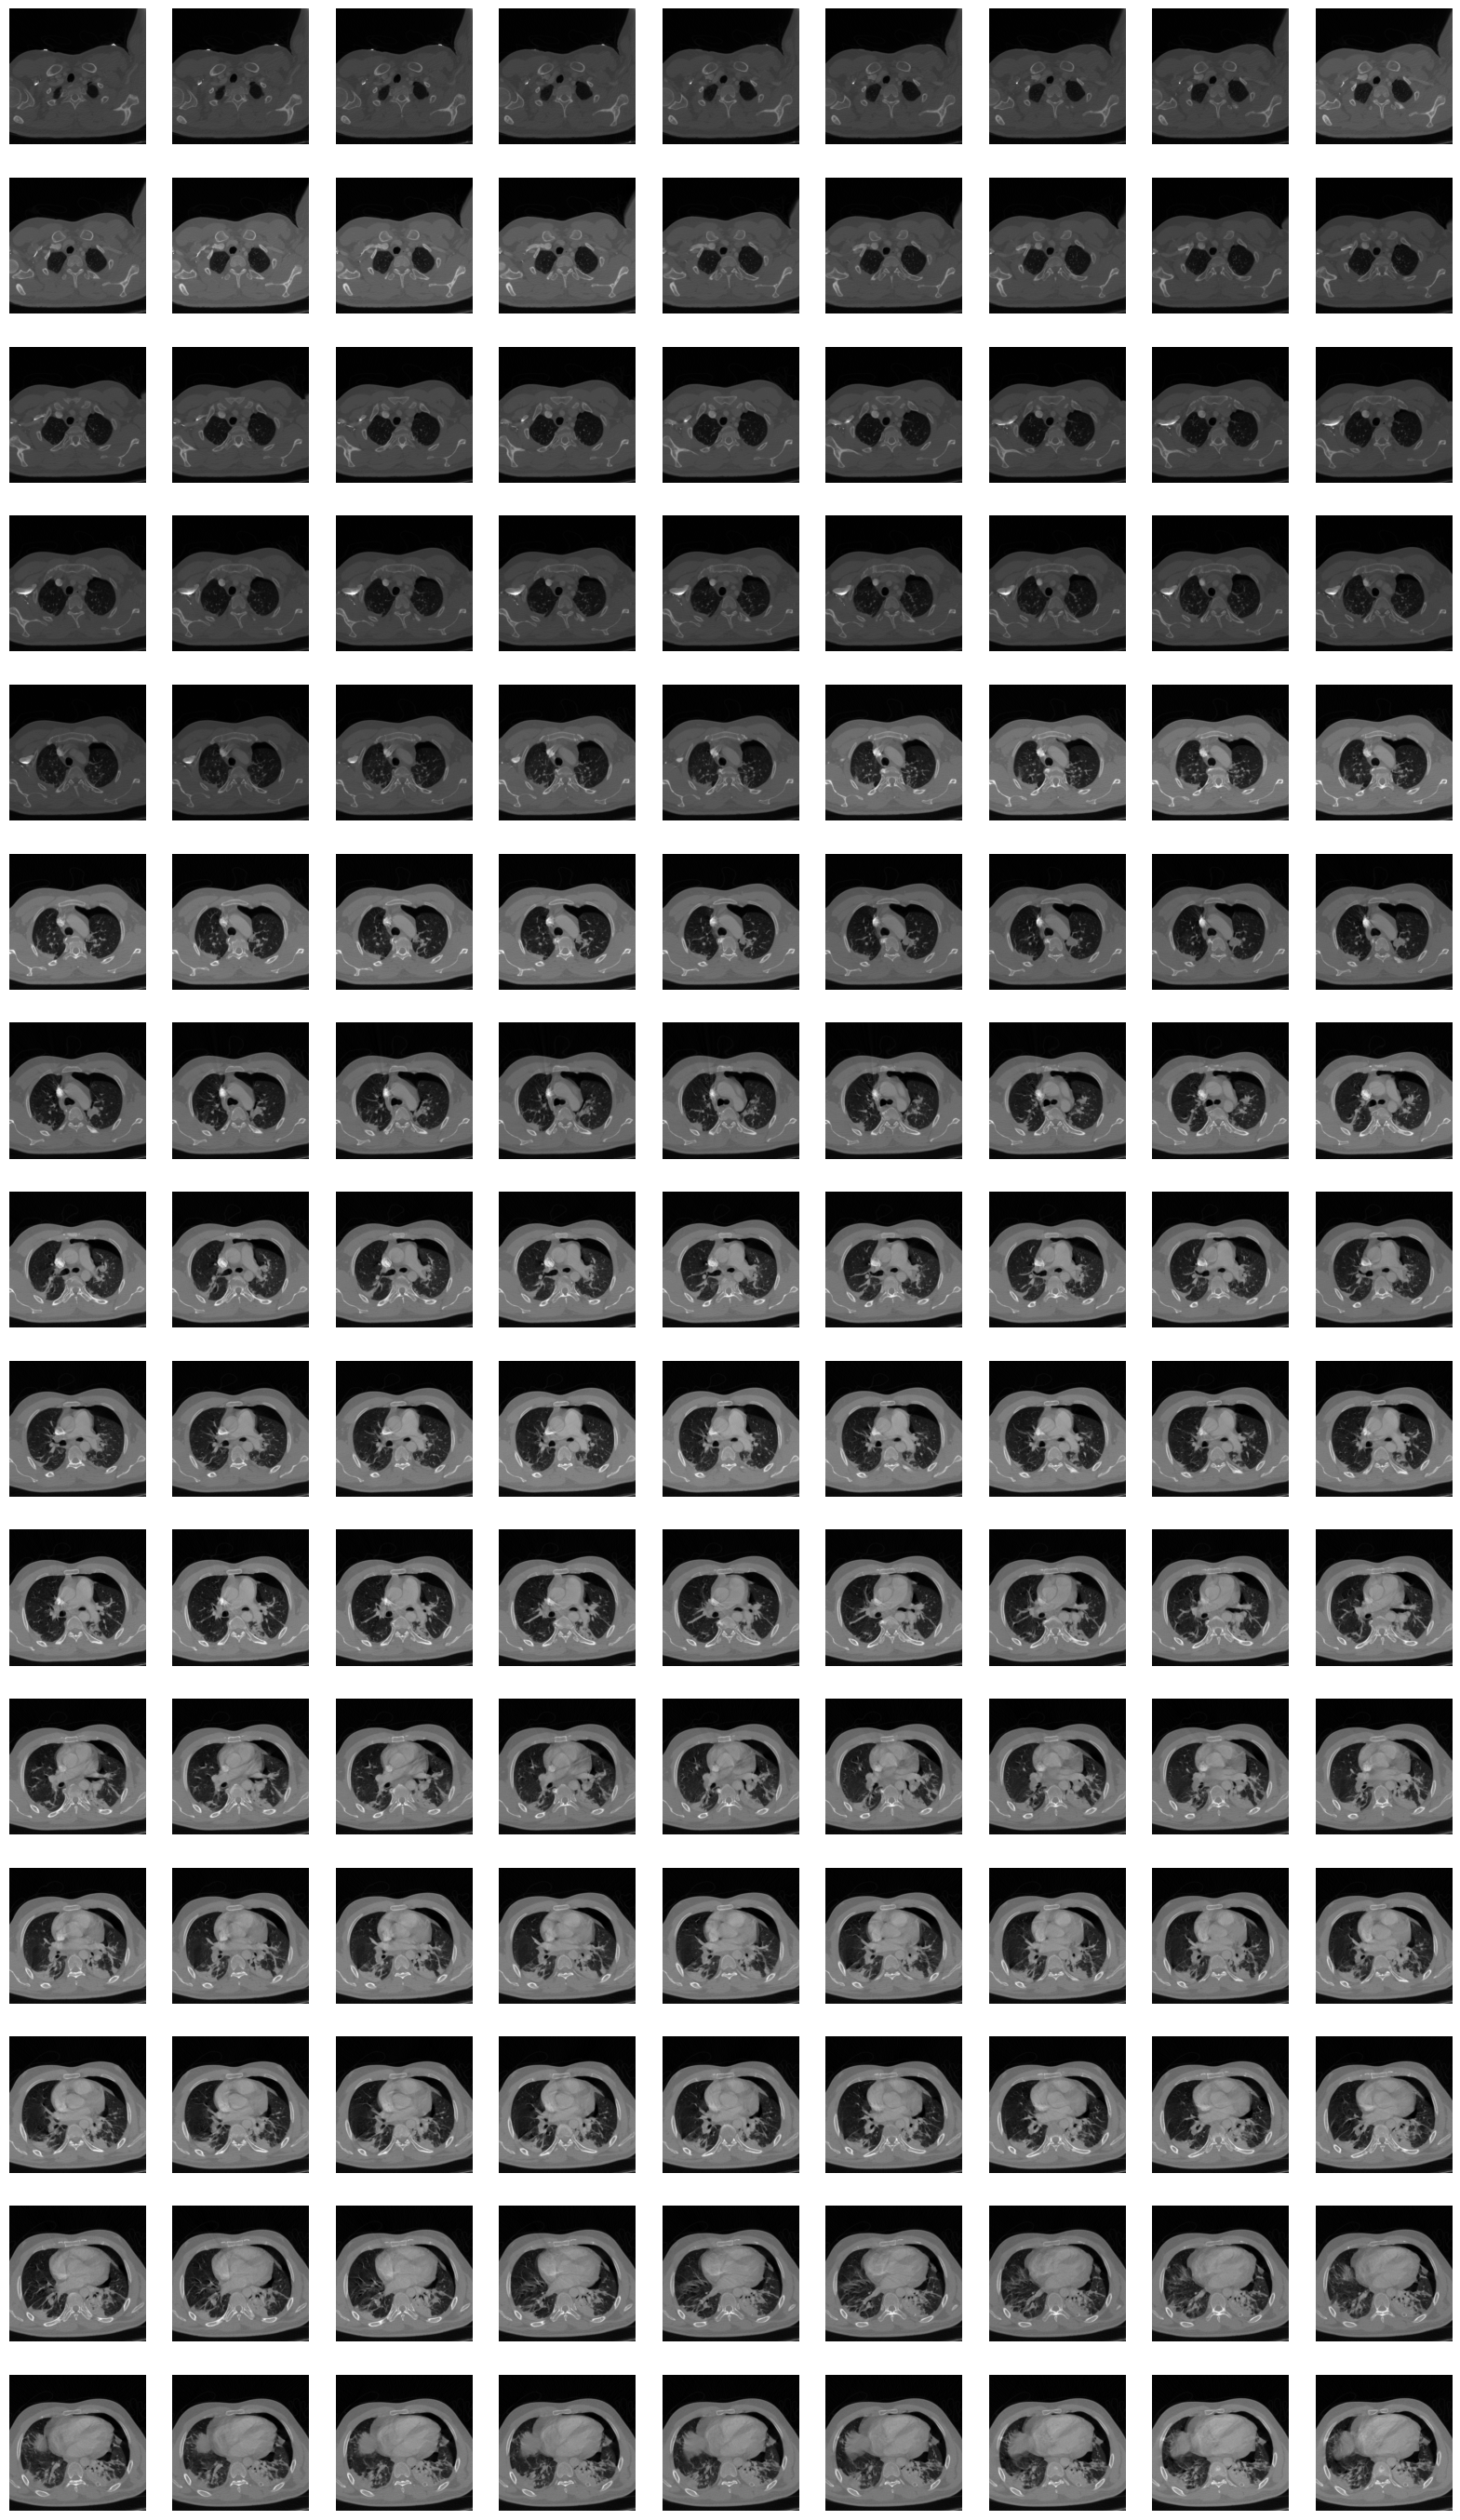

In [17]:
fig, axis = plt.subplots(15, 9, figsize=(20,35))
slice_counter = 0
for i in range(15):
    for j in range(9):
        axis[i][j].axis('off')
        axis[i][j].imshow(full_volume[slice_counter], cmap='gray')
        slice_counter+=1

# Reescalando para trabalhar com o opencv e PIL

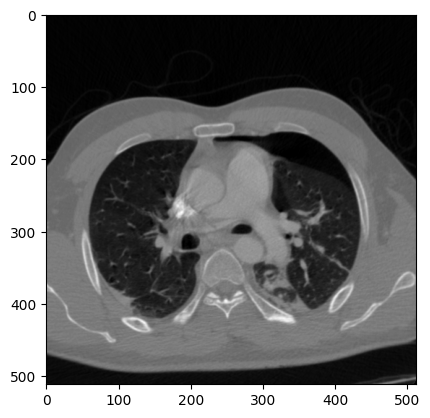

In [18]:
im = full_volume[80]
plt.imshow(im, cmap='gray')

In [19]:
im_float = im.astype('float')
rescaled_image = (np.maximum(im_float, 0)/im_float.max())*255
image = np.uint8(rescaled_image)
final_image = Image.fromarray(image)
final_image.show()

In [ ]:
cv2.imshow('teste', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def laplaciano(src, kernel_size=(3,3)):
    src = cv2.GaussianBlur(src, kernel_size, 0)
    try:
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    except:
        src_gray = src
    ddepth = cv2.CV_16S
    kernel_size = 3
    dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
    abs_dst = cv2.convertScaleAbs(dst)
    return abs_dst

In [ ]:
img_laplaciano = laplaciano(image)

In [ ]:
plt.imshow(img_laplaciano, cmap='gray')